# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки и прочитаем файл с данными

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Получим информацию о датасете

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем первые и последние 5 строк датасета. 

In [177]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [178]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


По результатам оценки таблицы видно, что она содержит 22 столбца и 23698 строки. В данных встречаются пропуски типа NaN.

Переименуем столбец согласно принятым для Питона обозначениям.

In [179]:
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace = True)
data.rename(columns = {'parks_around3000':'parks_around', 'ponds_around3000':'ponds_around'}, inplace=True)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

Построим гистограммы для всех параметров.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=ob

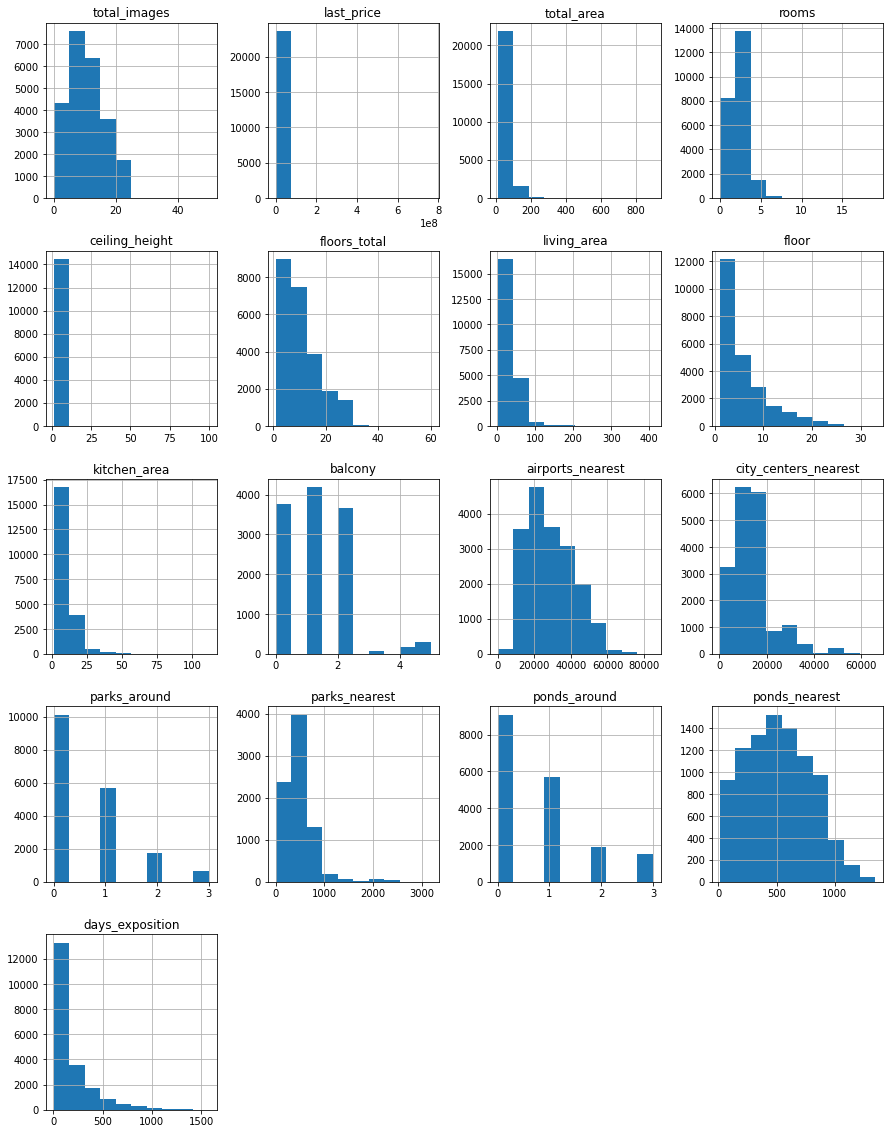

In [180]:
data.hist(figsize=(15, 20))

Вывод: 
Проведена оценка данных в датасете. По результатам оценки таблицы видно, что она содержит 22 столбца и 23698 строки. В данных встречаются пропуски типа NaN. Некоторые названия столбцов откорректированы с учетом требований, предъявляемых к названиям в Python. Построены гистограммы распределения значений для каждого столбца датасета.

## Предобработка данных

### Приведем время к понятному виду.

In [181]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Устраним пропуски, выбросы, а также приведем типы данных к необходимомму формату

Определим в каких столбцах датафрейма есть пропуски. Видим большое количество пропусков в разных столбцах

In [182]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around             5518
parks_nearest           15620
ponds_around             5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вызовем описание основных показателей каждого столбца.

In [183]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Обработаем столбец с высотой потолков

Заменим пропуски в столбце ceiling_height медианным значением. Данное значение наилучшим образом подойдет для заполнения, так как с большой вероятностью необзначенное значение высоты потолка будет стремится к медианному показателю.

In [184]:
ceiling_median = data['ceiling_height'].median()

In [185]:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)

Проверим значения высоты потолков на выбросы, т.к. потолков меньше 2.2 м не должно встречаться

In [186]:
count_ceiling_minimal = data.query('ceiling_height < 2.2')['ceiling_height'].count()

In [187]:
print(count_ceiling_minimal)

14


Удалим данные показатели по высоте из датасета.

In [188]:
#mean_ceiling_minimal = data.query('ceiling_height > 2.2' and 'ceiling_height < 5')['ceiling_height'].mean()

In [189]:
#print(mean_ceiling_minimal)

In [190]:
data.drop(index=data.query('ceiling_height < 2.2').index,inplace=True)

In [191]:
data.query('ceiling_height < 2.2') # проверим отсутсвие низких потолков в датасете

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition


Проведем оценку данных для высоты потолков более 10м.

In [192]:
round(data['ceiling_height'],0).value_counts()

3.0      19677
2.0       3574
4.0        392
5.0          9
27.0         8
25.0         7
8.0          4
6.0          4
32.0         2
10.0         1
26.0         1
20.0         1
28.0         1
24.0         1
14.0         1
23.0         1
100.0        1
Name: ceiling_height, dtype: int64

Оценка показывает, что имеется большое значение высоты потолков более 20 м, что может свидетельствовать в ошибках при заполнении данных. Проведем замену данных, уменьшив их на порядок, так как скорее всего ошибка именно в этом.

In [193]:
data.update(data[(data['ceiling_height'] >= 20)]['ceiling_height']/10)

In [194]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Обработаем столбца с наименованием города и высотой зданий

Удалим строки с пропусками floors_total и locality_name, так как их небольшое количество.

In [195]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)



#### Обработаем столбец с количеством балконов

Примем, что отсутсвие данных по количеству балконов свидетельствует об их отсутствии. Приведем данные к целочисленному типу.

In [196]:
data['balcony'] = data['balcony'].fillna(0).astype(int)


#### Обработаем столбец с данными является ли квартира аппартаментами

При отсутсвии сведений является ли квартира аппартаментами заменим значение на False.

In [197]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [198]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Обработаем столбец с площадью кухни

Заполним пропуски в данных по жилой площади средним значением в зависимости от площади кухни. 

In [199]:
mean_proportion_kitchen_area = ( data['kitchen_area'] / data['total_area'] ).mean()

In [200]:
mean_proportion_kitchen_area

0.18733934400012114

In [201]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*mean_proportion_kitchen_area)

In [202]:
data['kitchen_area'].isna().sum()

0

Определим количество кухонь меньше пяти метров, для замены их значений на среднее, так как такие кухни не могут быть по нормам строительства

In [203]:
count_kitchen_minimal = data.query('kitchen_area < 5')['kitchen_area'].count()

In [204]:
print(count_kitchen_minimal)

340


Удалим эти значения из датасета.

In [205]:
#mean_kitchen_minimal = data.query('kitchen_area > 5' and 'kitchen_area < 15')['kitchen_area'].median()

In [206]:
#print(mean_kitchen_minimal)

In [207]:
data.drop(index=data.query('kitchen_area < 5').index,inplace=True)

In [208]:
data.query('kitchen_area < 5') # проверим отсутсвие таких кухонь

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition


In [209]:
data['kitchen_area'].isna().sum()

0

In [210]:
data['kitchen_area'] = data['kitchen_area'].astype('int64') #Приведем к целочисленному типу

In [211]:
data['floors_total'] = data['floors_total'].astype('int64') #Приведем к целочисленному типу

#### Обработаем столбец с жилой площадью

Заполним пропуски в данных по жилой площади средним значением в зависимости от площади жилой зоны. 

In [212]:
mean_proportion_living_area = ( data['living_area'] / data['total_area'] ).mean()

In [213]:
mean_proportion_living_area 

0.5632548118699537

In [214]:
data['living_area'] = data['living_area'].fillna(data['total_area']*mean_proportion_living_area)

In [215]:
data['living_area'] = data['living_area'].astype('int64') #Приведем к целочисленному типу

In [216]:
data['living_area'].isna().sum()

0

In [217]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,...,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,...,11,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34,4,False,...,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89,9,False,...,29,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,...,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14,5,False,...,9,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10,6,False,...,14,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40,22,False,...,18,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15,26,False,...,8,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43,7,False,...,6,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23211 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23211 non-null  int64         
 1   last_price            23211 non-null  float64       
 2   total_area            23211 non-null  float64       
 3   first_day_exposition  23211 non-null  datetime64[ns]
 4   rooms                 23211 non-null  int64         
 5   ceiling_height        23211 non-null  float64       
 6   floors_total          23211 non-null  int64         
 7   living_area           23211 non-null  int64         
 8   floor                 23211 non-null  int64         
 9   is_apartment          23211 non-null  bool          
 10  studio                23211 non-null  bool          
 11  open_plan             23211 non-null  bool          
 12  kitchen_area          23211 non-null  int64         
 13  balcony         

#### Обработаем столбец расстояния до ближайшего аэропорта

Заполним пропуски в airports_nearest средним значением расстояния в зависимости от местности (locality_name)

In [219]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [220]:
data['locality_name'] = data['locality_name'].str.lower()

In [221]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [222]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', '')

In [223]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', '')

In [224]:
data['locality_name'] = data['locality_name'].str.replace('деревня', '')

In [225]:
data['locality_name'] = data['locality_name'].str.replace('село', '')

In [226]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')

In [227]:
data['locality_name'] = data['locality_name'].str.replace(' ', '')

In [228]:
data['locality_name'].unique()

array(['санкт-петербург', 'покшушары', 'янино-1', 'покпарголово',
       'покмурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'кудрово', 'коммунар', 'колпино', 'красныйбор', 'гатчина',
       'федоровское', 'выборг', 'кронштадт', 'кировск', 'новоедевяткино',
       'покметаллострой', 'лебяжье', 'сиверский', 'покмолодцово',
       'кузьмоловский', 'садовоетовариществоноваяропша', 'павловск',
       'пикколово', 'всеволожск', 'волхов', 'кингисепп', 'приозерск',
       'сестрорецк', 'куттузи', 'поканнино', 'ефимовский', 'покплодовое',
       'заклинье', 'покторковичи', 'покпервомайское', 'красное',
       'покпонтонный', 'сясьстрой', 'старая', 'лесколово', 'покновыйсвет',
       'сланцы', 'путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зеленогорск', 'сосновыйбор', 'оржицы', 'кальтино',
       'покромановка', 'покбугры', 'рощино', 'луга', 'волосово',
       'отрадное', 'павлово', 'покоредеж', 'копорье', 'покмолодежное',
       'тихвин', 'покпобеда', 

In [229]:
city = data['locality_name'].unique().tolist()

In [230]:
city

['санкт-петербург',
 'покшушары',
 'янино-1',
 'покпарголово',
 'покмурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'кудрово',
 'коммунар',
 'колпино',
 'красныйбор',
 'гатчина',
 'федоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'новоедевяткино',
 'покметаллострой',
 'лебяжье',
 'сиверский',
 'покмолодцово',
 'кузьмоловский',
 'садовоетовариществоноваяропша',
 'павловск',
 'пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'куттузи',
 'поканнино',
 'ефимовский',
 'покплодовое',
 'заклинье',
 'покторковичи',
 'покпервомайское',
 'красное',
 'покпонтонный',
 'сясьстрой',
 'старая',
 'лесколово',
 'покновыйсвет',
 'сланцы',
 'путилово',
 'ивангород',
 'мурино',
 'шлиссельбург',
 'никольское',
 'зеленогорск',
 'сосновыйбор',
 'оржицы',
 'кальтино',
 'покромановка',
 'покбугры',
 'рощино',
 'луга',
 'волосово',
 'отрадное',
 'павлово',
 'покоредеж',
 'копорье',
 'покмолодежное',
 'тихвин',
 'покпобеда',
 'нурма',
 'синявино',
 'тосно',
 'пок

In [231]:
median_airports_nearest = data.pivot_table(index = 'locality_name', values = 'airports_nearest', aggfunc = 'median')

In [232]:
median_airports_nearest.head(30)

,airports_nearest
locality_name,
зеленогорск,72280.0
колпино,26232.0
красное,25715.5
кронштадт,67847.0
ломоносов,48406.0
павловск,20529.5
петергоф,39231.0
покалександровская,12896.5
покбелоостров,57769.0


In [233]:
# заменим значения циклом  на медиану по городу
for i in list(median_airports_nearest.index):
    data.loc[(data['locality_name'] == i) & (data['airports_nearest'].isna()), 'airports_nearest'] =\
    median_airports_nearest[median_airports_nearest.index == i]['airports_nearest']

In [234]:
data['airports_nearest'].isna().sum()

5356

Почему так не получилось, поясните, пожалуйста!!

for name in city:
    data.loc[(data['locality_name'] == name) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == name), 'airports_nearest'].median()
                                  

#### Обработаем столбец расстояния до центра города

In [235]:
city_center_nearest = data.pivot_table(index = 'locality_name', values = 'city_centers_nearest', aggfunc = 'median')

In [236]:
print(city_center_nearest)

                    city_centers_nearest
locality_name                           
зеленогорск                      53379.0
колпино                          32018.0
красное                          29140.5
кронштадт                        49572.5
ломоносов                        51677.0
павловск                         32683.0
петергоф                         33771.0
покалександровская               27468.0
покбелоостров                    38868.0
поклевашово                      25727.0
поклисийнос                      28226.0
покметаллострой                  27619.0
покмолодежное                    65764.0
покпарголово                     19311.0
покпесочный                      27083.5
покпетро-славянка                27165.0
покпонтонный                     32354.0
покрепино                        42896.5
поксаперный                      35859.5
покстрельна                      23498.5
покусть-ижора                    28222.5
покшушары                        24213.0
пушкин          

In [237]:
# заменим значения циклом  на медиану по городу
for i in list(city_center_nearest.index):
    data.loc[(data['locality_name'] == i) & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] =\
    city_center_nearest[city_center_nearest.index == i]['city_centers_nearest']

In [238]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5356
city_centers_nearest     5333
parks_around             5332
parks_nearest           15240
ponds_around             5332
ponds_nearest           14289
days_exposition          3141
dtype: int64

In [239]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,...,25,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,...,11,2,покшушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34,4,False,...,8,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89,9,False,...,29,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,...,41,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14,5,False,...,9,0,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10,6,False,...,14,1,покпарголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40,22,False,...,18,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15,26,False,...,8,0,покмурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43,7,False,...,6,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Обработаем столбцы с информацией о парках

Оценим массив парков вокруг.

In [240]:
data['parks_around'].unique()

array([ 1.,  0.,  2., nan,  3.])

Исходя из количества парков, не превышающего три, заменим пропуски на отсутсвие парков.

In [241]:
data['parks_around'] = data['parks_around'].fillna(0)


In [242]:
data['parks_around'] = data['parks_around'].astype('int')

Рассмотрим данные в колонке parks_nearest.

In [243]:
data['parks_nearest'].agg(['min','max','mean','median'])

min          1.000000
max       3190.000000
mean       490.399699
median     454.000000
Name: parks_nearest, dtype: float64

Учитывая, что для разных типов населенных пунктов расстояни до парков различное, оставим пропуски без изменений

#### Обработаем столбцы с информацией о водоемах

Рассмотрим данные в колонке ponds_around

In [244]:
data['ponds_around'].agg(['min','max','median'])

min       0.0
max       3.0
median    0.0
Name: ponds_around, dtype: float64

Максимальное значение составляет 3 км. Вероятнее всего пропуски можно заменить 0, т.к. он означает, что рядом нет озера.

In [245]:
data['ponds_around'] = data['ponds_around'].fillna(0)

In [246]:
data['ponds_around'] = data['ponds_around'].astype('int')

Рассмотрим данные в колонке ponds_nearest

In [247]:
data['ponds_nearest'].agg(['min','max','mean','median'])

min         13.00000
max       1344.00000
mean       518.38377
median     503.00000
Name: ponds_nearest, dtype: float64

In [248]:
data['ponds_nearest'].isna().sum()

14289

Незаполненные данные скорее всего связаны с отсутствием водоемов. Оставим данные без изменения

In [249]:
data['days_exposition'].isna().sum()

3141

Незаполненные данные свидетельствуют о том, что объявление еще активно.

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23211 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23211 non-null  int64         
 1   last_price            23211 non-null  float64       
 2   total_area            23211 non-null  float64       
 3   first_day_exposition  23211 non-null  datetime64[ns]
 4   rooms                 23211 non-null  int64         
 5   ceiling_height        23211 non-null  float64       
 6   floors_total          23211 non-null  int64         
 7   living_area           23211 non-null  int64         
 8   floor                 23211 non-null  int64         
 9   is_apartment          23211 non-null  bool          
 10  studio                23211 non-null  bool          
 11  open_plan             23211 non-null  bool          
 12  kitchen_area          23211 non-null  int64         
 13  balcony         

Вывод: Проведена предобработка данных, заменены пропуски в значениях, где это каэется возможным, либо на средние или медианные значения, либо на 0. Для некоторых данных изменен тип. Дата приведена к читаемому виду. Можно переходить к исследовательскому анализу.

## Посчитайте и добавьте в таблицу новые столбцы

### Посчитаем стоимость одного квадратного метра.

In [251]:
data['square_meter_price'] = data['last_price'] / data['total_area']

In [252]:
data['square_meter_price'] = data['square_meter_price'].astype('int')

In [253]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18,1,False,...,2,покшушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34,4,False,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89,9,False,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32,13,False,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


### Определим день, месяц и год публикации

Определим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [254]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday

Определим месяц и год публикации

In [255]:
data['month'] = data['first_day_exposition'].dt.month

In [256]:
data['year'] = data['first_day_exposition'].dt.year

In [257]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_meter_price,day_of_week,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14,5,False,...,NaN,0,NaN,0,NaN,55.0,95065,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10,6,False,...,19143.0,0,NaN,0,NaN,155.0,99195,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40,22,False,...,11634.0,0,NaN,0,NaN,NaN,110544,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15,26,False,...,NaN,0,NaN,0,NaN,189.0,87454,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43,7,False,...,15008.0,0,NaN,0,NaN,289.0,88524,6,2,2017


### Опеределим тип этажа квартиры

Определим тип этажа квартиры (значения — «первый», «последний», «другой»).

In [258]:
def type_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    

In [259]:
data['type_floor'] = data.apply(type_floor, axis = 1)

In [260]:
data['type_floor'].value_counts()

Другой       17074
Последний     3285
Первый        2852
Name: type_floor, dtype: int64

### Определим расстояние до центра города

Расстояние до центра города в километрах.

In [261]:
data['city_сenters_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)

In [262]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_meter_price,day_of_week,month,year,type_floor,city_сenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,Другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,Другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,Другой,8.0


Вывод: Определена стоимость одного квадратного метра. Определены день недели, месяц и год публикации.
Определен тип этажа квартиры, первичный анализ показал, что продажи квартир на первом и последнем этаже зданий гораздо ниже.
Приведено расстояние до центра города в километрах.

## Проведите исследовательский анализ данных

Построим ряд гистограмм для исследования наиболее значимых параметров:
○ общая площадь;
○ жилая площадь;
○ площадь кухни;
○ цена объекта;
○ количество комнат;
○ высота потолков;
○ этаж квартиры;
○ тип этажа квартиры («первый», «последний», «другой»);
○ общее количество этажей в доме;
○ расстояние до центра города в метрах;
○ расстояние до ближайшего аэропорта;
○ расстояние до ближайшего парка;
○ день и месяц публикации объявления

### Определим распределение частоты общей площади в объявления

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

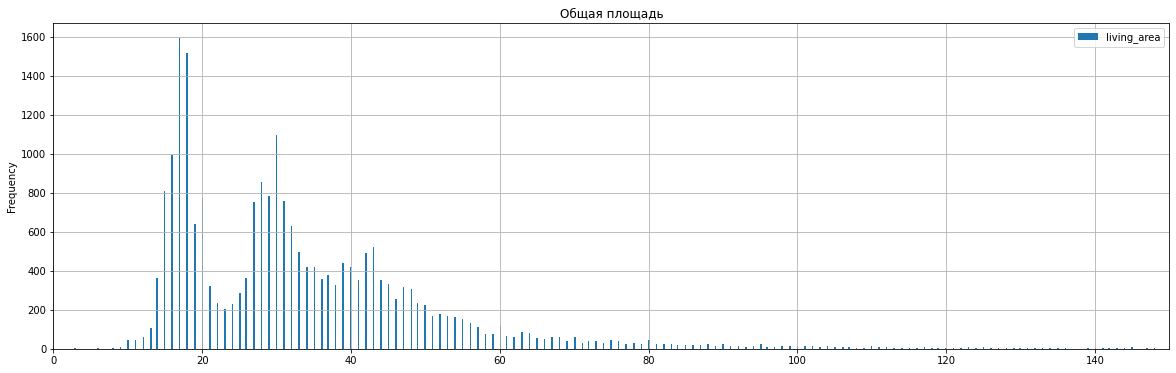

In [263]:
data.plot(kind='hist', title='Общая площадь', y='living_area', bins = 2000, grid=True, figsize=(20,6), xlim = (0, 150))




In [264]:
data['rooms'].value_counts()

2     7852
1     7813
3     5763
4     1171
5      325
6      104
0       93
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

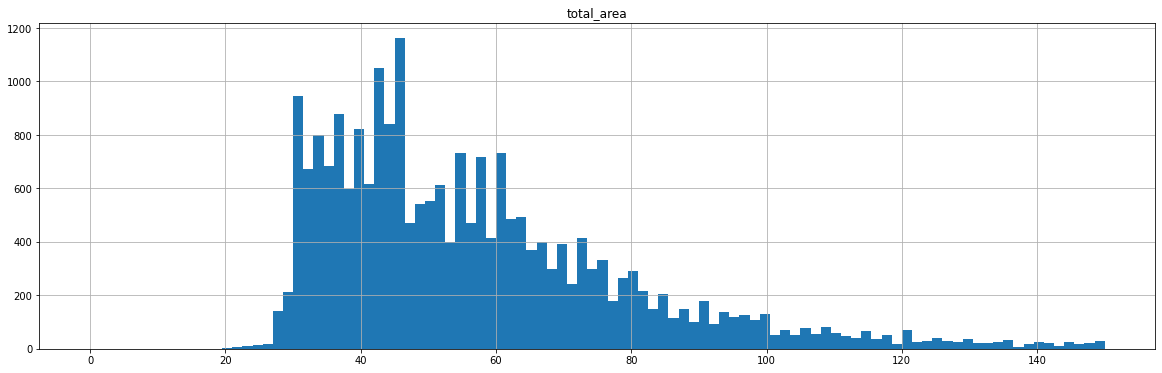

In [265]:
data.hist('total_area', bins=100, figsize=(20,6), range=(0, 150))

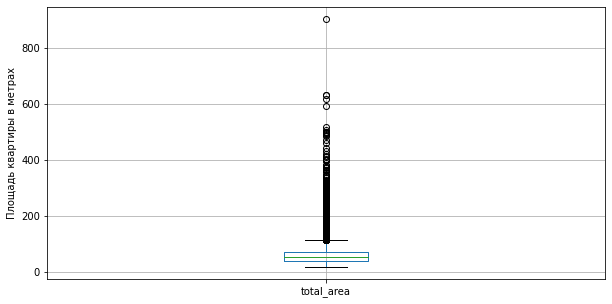

In [266]:
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

Распределение соответствует распределению Пуассона, с небольшим выбросом в районе 45-50 кв.м. На мой взгляд данная площадь является самой распространенной, так как на рынке присутствуют однокомнатные и двух комнатные квартиры такой площади. Проверим данное утверждение.

In [267]:
d = data.loc[(data['rooms'] > 1) & (data['total_area'] < 50) & (data['total_area'] > 40) ]
d

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,square_meter_price,day_of_week,month,year,type_floor,city_сenters_nearest_km
11,9,3300000.0,44.0,2018-08-27,2,2.65,5,31,4,False,...,NaN,0,NaN,7.0,75000,0,8,2018,Другой,52.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27,5,False,...,294.0,3,298.0,366.0,82943,5,7,2017,Последний,33.0
36,13,3790000.0,45.0,2017-01-25,2,2.65,9,27,9,False,...,459.0,0,NaN,139.0,84222,2,1,2017,Последний,16.0
37,10,1990000.0,45.8,2017-10-28,2,2.50,5,25,1,False,...,NaN,0,NaN,196.0,43449,5,10,2017,Первый,NaN
43,13,9330000.0,48.0,2017-01-10,2,3.00,4,28,4,False,...,NaN,1,492.0,763.0,194375,1,1,2017,Последний,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23625,12,6700000.0,42.0,2019-02-13,2,2.70,5,24,5,False,...,498.0,1,837.0,26.0,159523,2,2,2019,Последний,6.0
23633,20,1770000.0,42.0,2018-09-17,2,2.50,3,24,1,False,...,NaN,0,NaN,NaN,42142,0,9,2018,Первый,NaN
23643,1,660000.0,45.0,2019-02-19,2,2.65,5,31,4,False,...,NaN,0,NaN,NaN,14666,1,2,2019,Другой,NaN
23668,13,6000000.0,47.0,2018-03-16,2,3.00,5,27,4,False,...,238.0,0,NaN,157.0,127659,4,3,2018,Другой,9.0


### Определим распределение частоты жилой площади в объявлениях

<AxesSubplot:title={'center':'жилая площадь'}, ylabel='Frequency'>

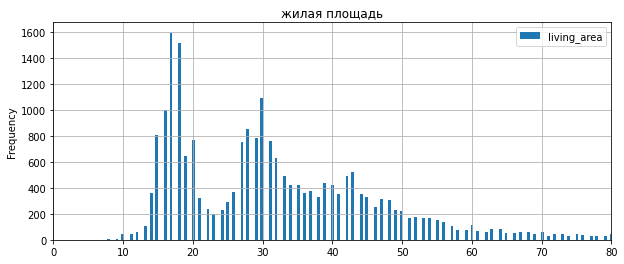

In [268]:
data.plot(kind='hist', title='жилая площадь', y='living_area', bins=1000, grid=True, figsize=(10,4), xlim = (0, 80))


array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

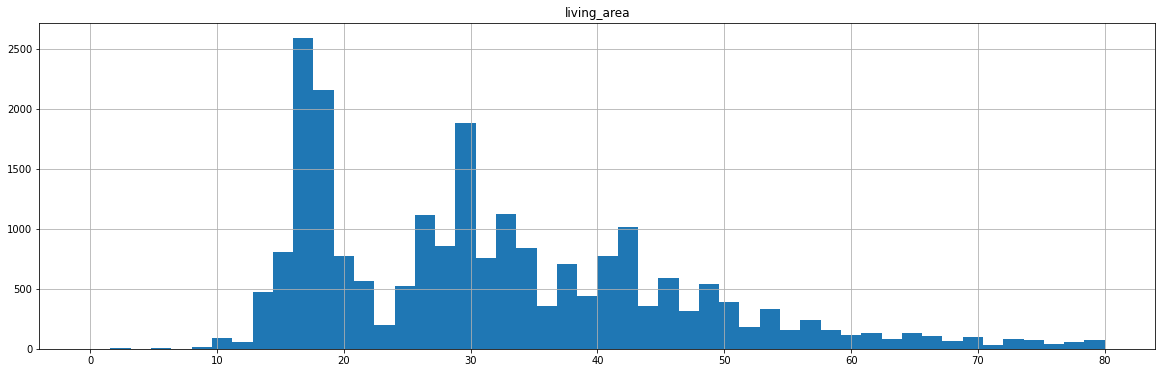

In [269]:
data.hist('living_area', bins=50, figsize=(20,6), range=(0, 80))

Видим распределение Пуассона. При этом отмечаются пики в районе 18, 30 и 43 кв.м. Возможно они соответствуют 1, 2 и 3 комнатным квартирам, как наиболее распространенным вариантам.

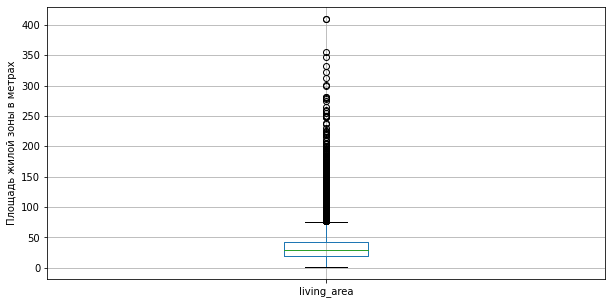

In [270]:
data.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь жилой зоны в метрах')
plt.show()

Диаграмма размаха показывает, что большинство квартир площадью от 30 до 50м2.

### Определим частоту распределения площади кухни в объявлениях 

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

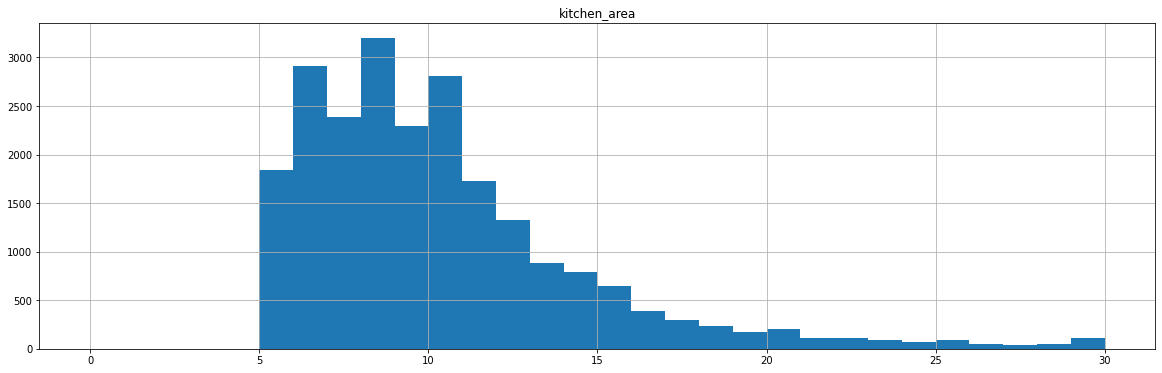

In [271]:
data.hist('kitchen_area', bins=30, figsize=(20,6), range=(0, 30))

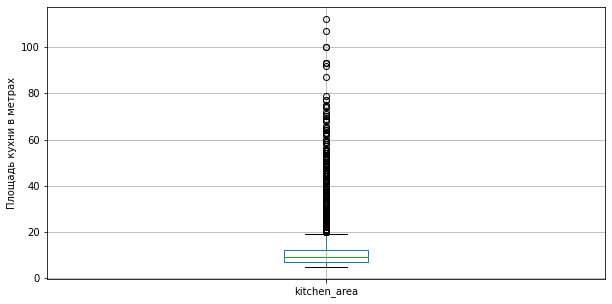

In [272]:
data.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь кухни в метрах')
plt.show()

Видим распределение Пуассона. В основном кухни от 7 до 10 м2. Площадь в основном не превышвет 20 м2.

### Определим частоту распределения цены в объявлениях

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

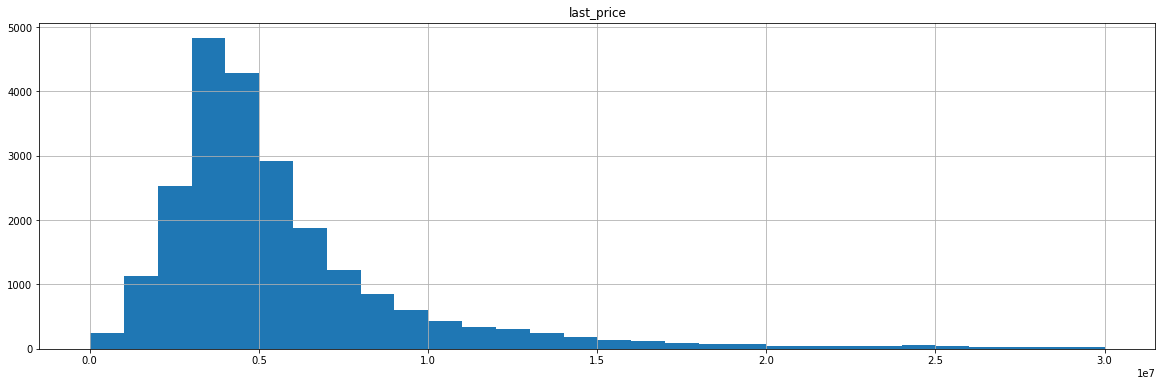

In [273]:
data.hist('last_price', bins=30, figsize=(20,6), range=(10000, 30000000))

Видим нормальное распределение со средней ценой объекта в 4 - 5 млн.

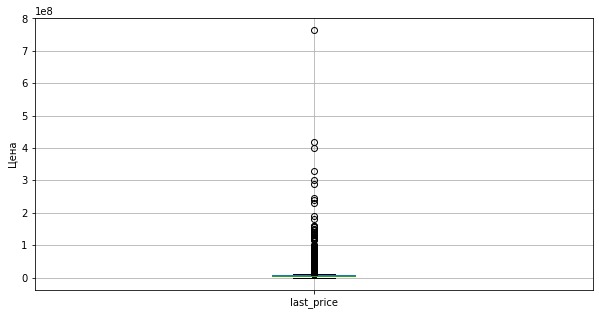

In [274]:
data.boxplot(column=['last_price'], figsize=(10,5), grid=True)
plt.ylabel('Цена')
plt.show()

### Определим распределение квартир по количеству комнат

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

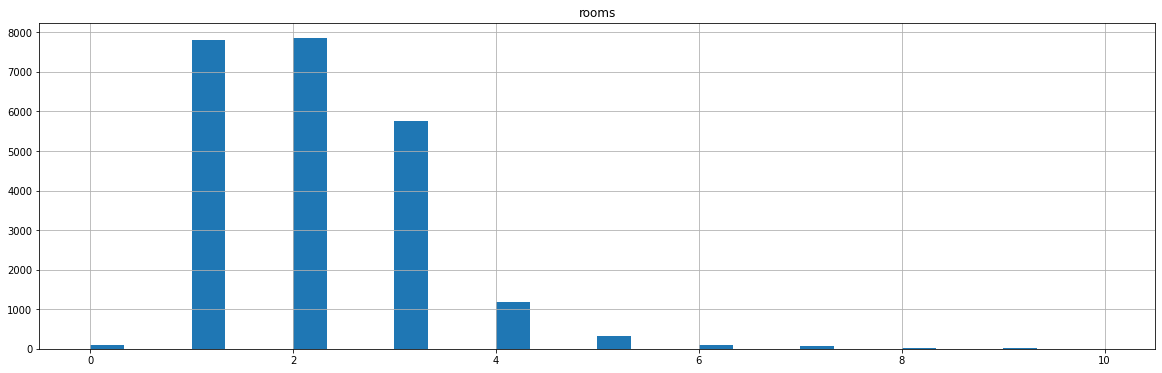

In [275]:
data.hist('rooms', bins=30, figsize=(20,6), range=(0, 10))

Распределение Пуассона с преобладанием 1 и 2 комнатных квартир.

### Определим этажность зданий

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

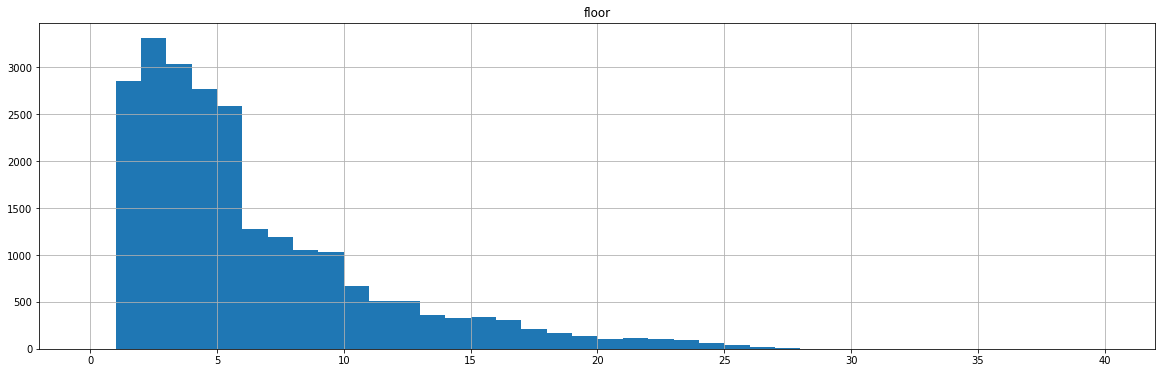

In [276]:
data.hist('floor', bins=40, figsize=(20,6), range=(0, 40))

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

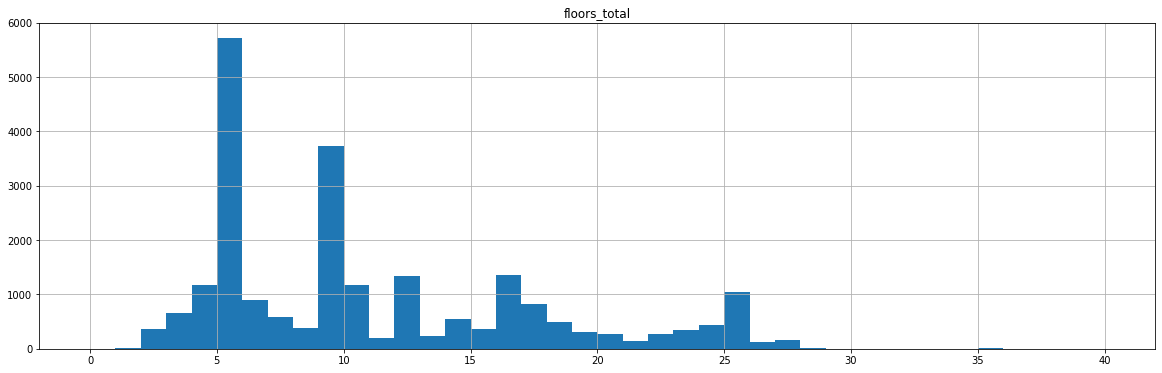

In [277]:
data.hist('floors_total', bins=40, figsize=(20,6), range=(0, 40))

Распределение Пуассона. Видим четкое преобладание 5 этажных домов. Затем 9 этажных и всех остальных.

Также преобладают 5 и 9 этажные дома.

### Определим тип этажа в объявлениях

<AxesSubplot:>

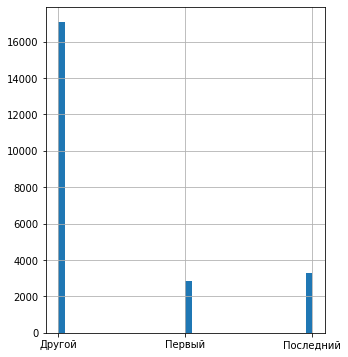

In [278]:
data['type_floor'].hist( bins=40, figsize=(5,6))

Первый и последний этаж не пользуются популярностью.

### Определим расстояние от центра

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

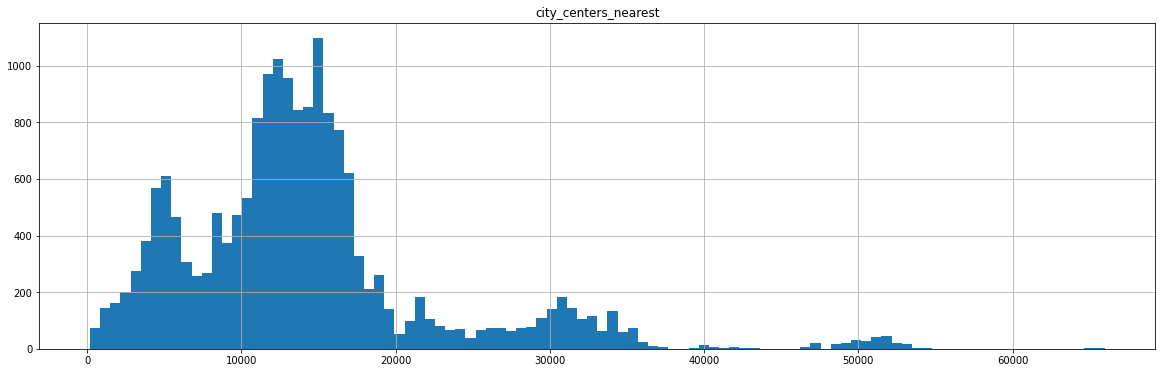

In [279]:
data.hist('city_centers_nearest', bins=100, figsize=(20,6))



В основном квартиры располагаются в 12-15 км от центра.

###  Определим расстояние до аэропорта

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

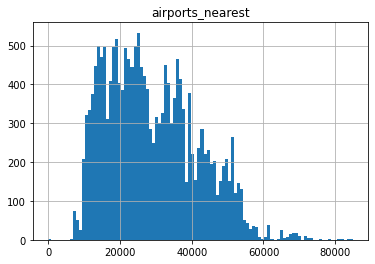

In [280]:
data.hist('airports_nearest', bins=100)



Расстояние до аэропорта в районе 20-25 км.

### Определим число квартир рядом с парками

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

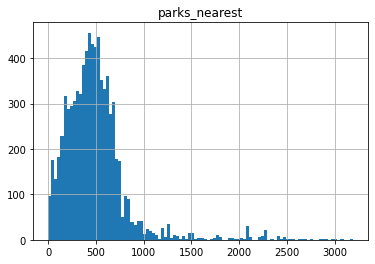

In [281]:
data.hist('parks_nearest', bins=100)



Часть квартир располагается рядом с парком, основная масса квартир на расстоянии более 2 км от парка.

### Определим количество объвлений по дням и месяцам

array([[<AxesSubplot:title={'center':'day_of_week'}>]], dtype=object)

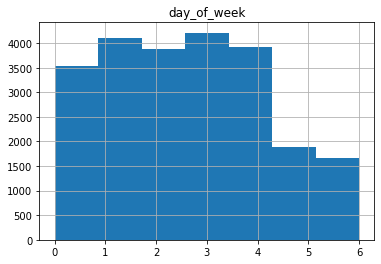

In [282]:
data.hist('day_of_week', bins=7)



Объявления выкладывают преимущественно в будние дни.

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

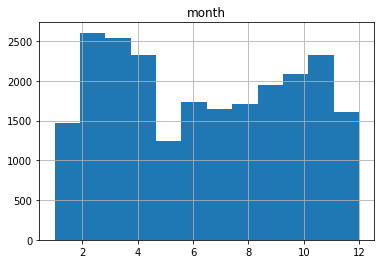

In [283]:
data.hist('month', bins=12)

Видим преобладание активности продавцов в весенне-осенний период.

### Изучим, как быстро продавались квартиры от даты объявления.

In [284]:
data['days_exposition'].agg(['min','max','mean','median'])


min          1.000000
max       1580.000000
mean       181.598754
median      96.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

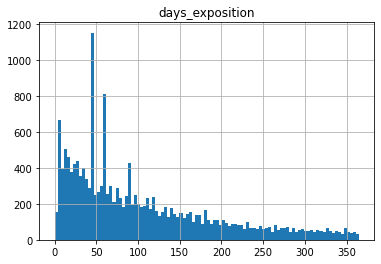

In [285]:
data.hist('days_exposition', bins=100, range=(0, 365))

В основном квартиры продаются в срок от 2 до 3 месяцев. Часть квартир продается в день объявления или в срок до 45 дней. Часть квартир продается очень долго до года и более.

### Определим какие факторы больше всего влияют на общую (полную) стоимость объекта.

In [286]:
factors = ['total_area','living_area','kitchen_area','rooms','day_of_week','month','year']
for factor in factors:
    corr = data['last_price'].corr(data[factor])
    print(f'Корреляция между last_price и {factor} составляет: {corr:0.2%}')

Корреляция между last_price и total_area составляет: 65.38%
Корреляция между last_price и living_area составляет: 58.49%
Корреляция между last_price и kitchen_area составляет: 51.63%
Корреляция между last_price и rooms составляет: 36.22%
Корреляция между last_price и day_of_week составляет: 0.11%
Корреляция между last_price и month составляет: 0.27%
Корреляция между last_price и year составляет: -4.27%


<AxesSubplot:title={'center':'Зависимость средней цены от общей площади'}, xlabel='total_area'>

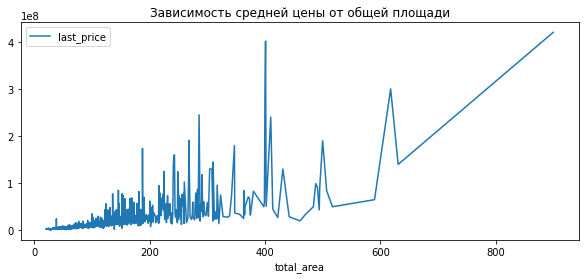

In [287]:
data.pivot_table(index='total_area', values='last_price')\
.plot(style='-',title='Зависимость средней цены от общей площади', figsize=(10,4))

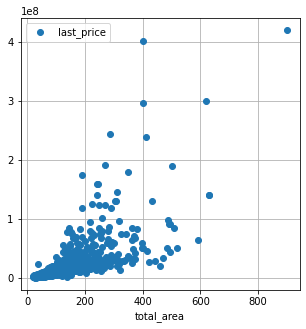

In [288]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()


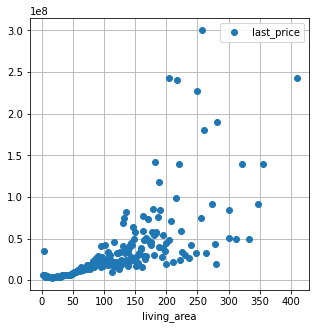

In [289]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

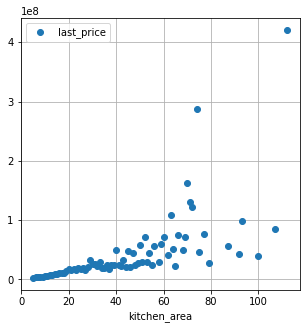

In [290]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()

              day_of_week  kitchen_area  living_area     month     rooms  \
day_of_week      1.000000     -0.000156    -0.000753  0.043516 -0.031354   
kitchen_area    -0.000156      1.000000     0.636026 -0.016370  0.482441   
living_area     -0.000753      0.636026     1.000000  0.017351  0.820125   
month            0.043516     -0.016370     0.017351  1.000000  0.013587   
rooms           -0.031354      0.482441     0.820125  0.013587  1.000000   
total_area       0.000606      0.732531     0.962490  0.018177  0.782393   
year            -0.024183     -0.102365    -0.086685 -0.274142 -0.084951   

              total_area      year  
day_of_week     0.000606 -0.024183  
kitchen_area    0.732531 -0.102365  
living_area     0.962490 -0.086685  
month           0.018177 -0.274142  
rooms           0.782393 -0.084951  
total_area      1.000000 -0.111084  
year           -0.111084  1.000000  


array([[<AxesSubplot:xlabel='day_of_week', ylabel='day_of_week'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='day_of_week'>,
        <AxesSubplot:xlabel='living_area', ylabel='day_of_week'>,
        <AxesSubplot:xlabel='month', ylabel='day_of_week'>,
        <AxesSubplot:xlabel='rooms', ylabel='day_of_week'>,
        <AxesSubplot:xlabel='total_area', ylabel='day_of_week'>,
        <AxesSubplot:xlabel='year', ylabel='day_of_week'>],
       [<AxesSubplot:xlabel='day_of_week', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='month', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='year', ylabel='kitchen_area'>],
       [<AxesSubplot:xlabel='day_of_week', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_ar

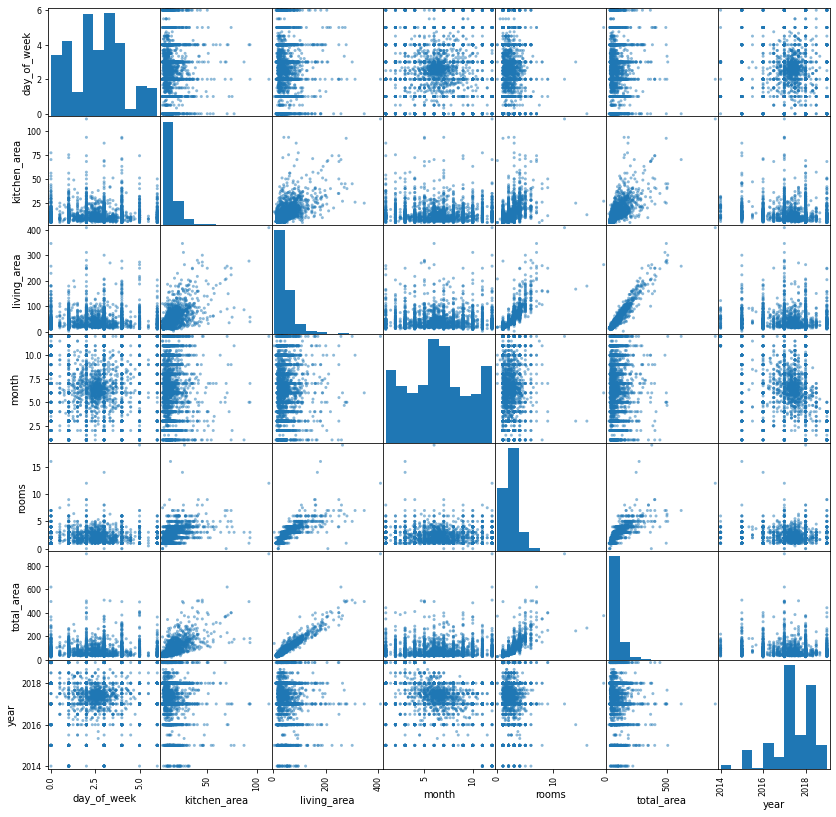

In [291]:
station_stat_multi = data.pivot_table(index = 'last_price', values = [ 'total_area','living_area','kitchen_area','rooms','day_of_week','month','year'])
print(station_stat_multi.corr())
pd.plotting.scatter_matrix(station_stat_multi, figsize=(14, 14))

 Из графиков и оценки корреляции видна взаимосвязь между площадью квартиры, жилой площадью и площадью кухни и ценой связанная с увеличением цены от увеличения площади. При этом мы видим что на жилой площади до 100 м2 наблюдается большой разброс цен, связанный на мой взгляд с тем, что в данном диапазоне встречаются квартиры  с разным типом ремонта, напрямую влияющим на цену квадратного метра.

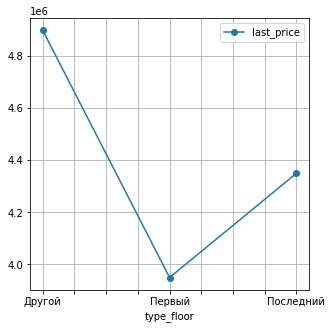

In [292]:
(
    data.pivot_table(index='type_floor', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Первый этаж является самым непопулярным вариантом, поэтому продавцы вынуждены снижать цену. Последний этаж выбирают с большей охотой, но также имеются опасения и стереотипы о жизни "под крышей", поэтому цена ниже, чем на других этажах.

<AxesSubplot:xlabel='rooms'>

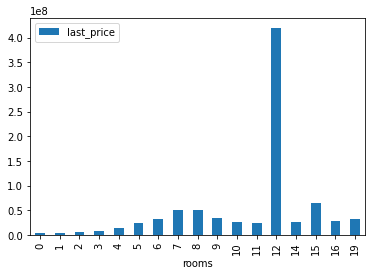

In [293]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')

In [294]:
data['rooms'].value_counts()

2     7852
1     7813
3     5763
4     1171
5      325
6      104
0       93
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

С увеличением числа комнат увеличивается цена. После значения в 8 комнат данная зависимость не столь очевидна и цена определяется другими факторами (расположением, ремонтом и т.д.).

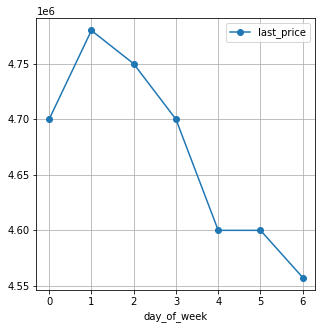

In [295]:
(
    data.pivot_table(index='day_of_week', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

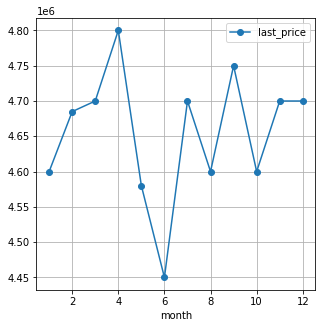

In [296]:
(
    data.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

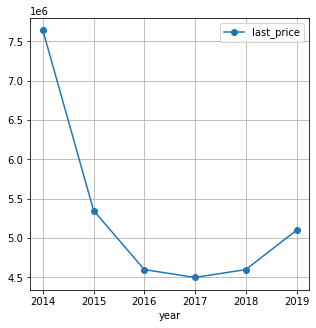

In [297]:
(
    data.pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

В начале недели люди выкладывают объявления с большей стоимостью, которая снижается к выходным. Может быть это связано с тем, что люди решаются на такой серьезный шаг с новой недели. А на выходных выкладывается часть откорректированных объявлений по результатам тенденции продажи, разговоров с риэлторами и потенциальными покупателями.
Если оценивать по месяцам, то максимальная цена весной, люди хотят поменять жилищные условия перед летом, т.к. проще переезжать в теплое время. Летом же намечается спад, т.к. это период отпусков и рынок замирает.
По годам видим общую просадку, связанную с кризисом 2014 года. С 2018 года началось выправление ситуации и подъем цен.

### Определим среднюю цену квадратного метра в населенных пунктах

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [298]:
data_top_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_top_10.columns=['number_of_ads']
data_top_10

,number_of_ads
locality_name,
санкт-петербург,15491
покмурино,501
кудрово,436
покшушары,431
всеволожск,393
пушкин,366
колпино,337
покпарголово,326
гатчина,302


In [299]:
data_top_10['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean')
data_top_10['cost_per_meter_mean'] = data_top_10['cost_per_meter_mean'].astype('int')
data_top_10.sort_values(by = 'cost_per_meter_mean', ascending = False)

,number_of_ads,cost_per_meter_mean
locality_name,,
санкт-петербург,15491,114735
пушкин,366,103187
кудрово,436,94657
покпарголово,326,90273
покмурино,501,84517
покшушары,431,78047
колпино,337,75330
гатчина,302,68845
всеволожск,393,68778


Очевидно цена в Санкт-Петербурге выше, чем цена в пригороде и предложений о продаже также больше. Цена м2 в Выборге самая низкая.

### Определим цену объектов в Санкт-Петербурге в зависимости от километража от центра города.

Выделим квартиры в Санкт-Петербурге и определим среднюю цену каждого километра. 

<AxesSubplot:xlabel='city_сenters_nearest_km'>

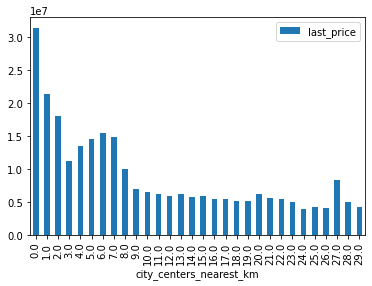

In [300]:
data[data['locality_name'] == 'санкт-петербург'].pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc='mean').plot(kind='bar')

Видим общий тренд на снижение стоимости жилья в зависимости от центра города. Всплеск стоимости на 27 км может быть связан с элитным коттеджным поселком.

Вывод:
В основном преобладают квартиры площадью 45-50 кв.м. На мой взгляд данная площадь является самой распространенной, так как на рынке присутствуют однокомнатные и двух комнатные квартиры такой площади. отмечаются пики в размерах жилой площади в районе 18, 30 и 43 кв.м. Возможно они соответствуют 1, 2 и 3 комнатным квартирам, как наиболее распространенным вариантам. Кухни в среднем занимают от 7 до 10м2. Средняя стоимость обектов в диапазоне от 4,5 до 5 млн. В основном преобладают 5 и 9 этажные дома. Обявления в основном выкладываются в осенне-весений период. Летом происходит спад активности. Среднее время продажи квартиры - 3 месяца. По годам видим общую просадку, связанную с кризисом 2014 года. С 2018 года началось выправление ситуации и подъем цен. Цена в Санкт-Петербурге выше, чем цена в пригороде и предложений о продаже также больше, цена снижается в заисимости от расстояния от центра.

## Общий вывод

В данной работе был исследован массив данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
Была проведена первоначальная предобработка данных: время было приведено к принятому формату, изменены типы данных для некоторых столбцов, названия столбцоы приведены к принятому в Python. 
Было установлено, что датасет имеет большое количество пропусков. В некоторых случаях, при небольшом количестве пропусков, данные были просто удалены. В некоторых случаях, таких как высота потолков и определение площади кухни, значения были заменены на средние. Исходя из общего количества парков, не превышающего три, пропуски заменены на отсутсвие парков.
Был проведен анализ на поиск неявных дубликатов в названиях городов, с приведением их к одному виду.
Был проведен анализ данных на логичность, с заменой явных выбросов на средние значения. Например высота потолков менее 2.2 м и площадь кухни менее 5 м2. Также высота потолков более 20 м была признана ошибочной и проведна замена значений на порядок меньшими. Пропущенные значения по площади кухни и площади жилой зоны были заполнены средним значением в зависимости от оношения площади кухни к общей площади. Пропущенные значения в расстояниях до аэропорта и до центра города заполненны медианным значением для каждого населенного пункта.

По результатам исследовательского анализа определена стоимость одного квадратного метра.  Определены день недели, месяц и год публикации. Определен тип этажа квартиры, первичный анализ показал, что продажи квартир на первом и последнем этаже зданий гораздо ниже. Приведено расстояние до центра города в километрах.

Для определения влияния различных показателей на стоимость были псотроены графики и гистограммы через сводные таблицы, построены диаграммы размаха. Полученные распределения носят вид нормального или распределения Пуассона, что говорит о корректности данных.

Наблюдается корреляция в данных о площади квартиры, кухни, жилой зоны и количеством комнат и стоимостью объекта, связанная с увеличением цены от увеличения площади. При этом мы видим что на жилой площади до 100 м2 наблюдается большой разброс цен, связанный на мой взгляд с тем, что в данном диапазоне встречаются квартиры с разным типом ремонта, напрямую влияющим на цену квадратного метра. Возможно проведение дальнейшего исследования о том, как сильно различаются цены для квартир одинаковой площади, расположенных на одинаковом удалении от центра и в домах одинаковой этажности, чтобы определить средние цены с ремонтом и без него.
Определено, что в объявления реобладают квартиры площадью 45-50 кв.м.Это может свидетельствовать, что на рынке присутствуют однокомнатные и двух комнатные квартиры такой площади. отмечаются пики в размерах жилой площади в районе 18, 30 и 43 кв.м. Возможно они соответствуют 1, 2 и 3 комнатным квартирам, как наиболее распространенным вариантам. Необходимо провести исследование для определения средней площади квартир в зависимости от комнат (можно для домов разной этажности), чтобы установить влияние на цену. Кухни в среднем занимают от 7 до 10м2. Средняя стоимость обектов в диапазоне от 4,5 до 5 млн. 5 и 9 этажные дома являются самыми распространенными типами жилья. Обявления в основном выкладываются в осенне-весений период. Летом происходит спад активности. Среднее время продажи квартиры - 3 месяца. Также можно провести исследования для установления срока продажи квартиры в зависимости от месяца в каком было выложено объявление. По годам видим общую просадку, связанную с кризисом 2014 года. С 2018 года началось выправление ситуации и подъем цен. Цена в Санкт-Петербурге выше, чем цена в пригороде и предложений о продаже также больше, цена снижается в заисимости от расстояния от центра. При этом видим, что есть небольшой подъем на расстоянии 5-7 км. Необходимо исследовать с какими данными он связан, ви димо есть какое-то условие. повышающее цену (как вариант Лахта-центр ПАО "Газпром" и состоятельные люди, желающие купить квартиру рядом с работой). Также есть всплекс на 27 км, связанный видимо с элитным коттеджным поселком.
